In [232]:
#Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, matthews_corrcoef
#from sklearn.metrics import confusion_matrix, matthews_corrcoef
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.model_selection import train_test_split

In [233]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 04D2-DEF4

 Directory of C:\Users\estef\Dropbox\mis_modelos\LDA

31/01/2024  23:12    <DIR>          .
18/01/2024  15:25    <DIR>          ..
31/01/2024  22:49    <DIR>          .ipynb_checkpoints
07/09/2023  15:54           127,104 1_9_05_2023.ipynb
10/01/2024  20:32           347,248 1_Ultimo_LDA_DNA - copia.ipynb
26/01/2024  11:21           316,579 17_01_2023_Modelos_lLDA.ipynb
31/01/2024  17:10           244,705 18_01_24_version_definitiva.ipynb
10/01/2024  20:44           210,910 25_1_sep.ipynb
10/01/2024  20:43            95,447 25_sep_LDA.ipynb
05/09/2023  23:42            53,291 3_Modelo_KNN_Optimizado.ipynb
04/09/2023  19:01             5,861 Array.ipynb
07/09/2023  15:56            22,434 Clasification.ipynb
17/01/2024  16:32           109,685 Confusion_matrix.png
31/01/2024  15:13            60,034 Confusion_matrix_Forest.png
25/09/2023  18:50           512,527 data_DNA.csv
02/09/2023  18:31         7,699,276 Data_LD

In [235]:
#Loading Data:
pd.read_csv("Data_DNA.csv")
data = pd.read_csv("Data_DNA.csv")
data.head(30)

,n-pair,q-seq,r-seq,eq(obs),eqpred,p(eq=1),prediction_trainig,eref,Dq0_Seq,Dq1_Seq,Dq2_Seq
0,1,RL2F_267,Control_1043,1,1,0.736,training,-0.419,-2.211,-2.154,-2.144
1,18,RL2F_267,RL2F_479,1,1,0.735,training,2.384,-2.211,-2.154,-2.144
2,27,RL2F_693,Control_0650,1,1,0.964,training,-0.419,-2.461,-2.425,-2.420
3,47,RL2F_693,RL2F_458,1,1,0.964,training,2.384,-2.461,-2.425,-2.420
4,51,RL2F_559,RL1F_021,1,0,0.187,prediction,2.384,-1.744,-1.734,-1.731
5,54,RL2F_559,Control_0228,1,0,0.187,training,-0.419,-1.744,-1.734,-1.731
6,75,RL2F_268,Control_0873,1,0,0.039,training,-0.419,-1.134,-1.137,-1.138
7,81,RL2F_268,RL2F_267,1,0,0.039,training,2.384,-1.134,-1.137,-1.138
8,99,RL2F_296,RL2F_304,1,0,0.113,training,2.384,-1.612,-1.609,-1.607
9,109,RL2F_296,Control_0225,1,0,0.113,prediction,-0.419,-1.612,-1.609,-1.607


In [141]:
#Checking Data:
data["prediction_trainig"] = data["prediction_trainig"].str.strip()
print(len(data[data["prediction_trainig"] == "training"]))
print(len(data[data["prediction_trainig"] == "prediction"]))

5440
1360


In [142]:
#Data Splitting:
Y= data.iloc[:,3]
X = data.iloc[:, 7:]

In [143]:
#Splitting Data into Training and Prediction Sets:
train_data = data[data["prediction_trainig"] == "training"]
pred_data = data[data["prediction_trainig"] == "prediction"]

In [144]:
# Model Preparation for Decision Tree
X_train_tree= train_data.iloc[:, 7:]
X_test_tree= pred_data.iloc[:, 7:]
y_train_tree= train_data.iloc[:, 3]
y_test_tree= pred_data.iloc[:, 3]

print(X_test_tree.shape)
print(X_train_tree.shape)
print(y_test_tree.shape)
print(y_train_tree.shape)

(1360, 4)
(5440, 4)
(1360,)
(5440,)


In [145]:
#Model Preparation for Random Forest:
X_train_forest= train_data.iloc[:, 7:]
X_test_forest = pred_data.iloc[:, 7:]
y_train_forest= train_data.iloc[:, 3]
y_test_forest= pred_data.iloc[:, 3]

print(X_test_forest.shape)
print(X_train_forest.shape)
print(y_test_forest.shape)
print(y_train_forest.shape)

(1360, 4)
(5440, 4)
(1360,)
(5440,)


In [146]:
#Model Preparation for Gradient Boosting:
X_train_gb= train_data.iloc[:, 7:]
X_test_gb= pred_data.iloc[:, 7:]
y_train_gb= train_data.iloc[:, 3]
y_test_gb= pred_data.iloc[:, 3]

print(X_test_gb.shape)
print(X_train_gb.shape)
print(y_test_gb.shape)
print(y_train_gb.shape)

(1360, 4)
(5440, 4)
(1360,)
(5440,)


In [147]:
#X_tree
mlr_X_train_tree= X_train_tree[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]
mlr_X_test_tree = X_test_tree[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]

In [148]:
#X_forest
mlr_X_train_forest= X_train_forest[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]
mlr_X_test_forest = X_test_forest[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]

In [149]:
#X_gradient boosting
mlr_X_train_gb= X_train_gb[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]
mlr_X_test_gb= X_test_gb[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]

In [150]:
seed = 40
# Define the decision tree model
tree_model = DecisionTreeClassifier(random_state=seed)

In [151]:
#Define the hyperparameter search space
param_grid = {
    #'criterion': ['gini', 'entropy'],
    'max_depth': [10],
    'min_samples_split': [7],
    'min_samples_leaf': [2]
}

In [153]:
# Perform hyperparameter search by cross-validation
grid_search_tree = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search_tree.fit(mlr_X_train_tree, y_train_tree)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'max_depth': [10], 'min_samples_leaf': [2],
                         'min_samples_split': [7]},
             scoring='accuracy')

In [154]:
# Print the best hyperparameters 
best_params = grid_search_tree.best_params_
print("better hyperparameters :", best_params)

better hyperparameters : {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 7}


In [155]:
 # Print all hyperparameters, including internal hyperparameters
all_params = grid_search_tree.best_estimator_.get_params()
print("\nAll hyperparameters:")
for param_name in sorted(all_params.keys()):
    print(f"{param_name}: {all_params[param_name]}")


All hyperparameters:
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 10
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 2
min_samples_split: 7
min_weight_fraction_leaf: 0.0
random_state: 40
splitter: best


In [156]:
# ramdom forest models

In [157]:
#  X__forest 
mlr_X_train_forest= X_train_forest[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]
mlr_X_test_forest = X_test_forest[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]

In [158]:
# Define the random forest model
seed = 44
rf_model = RandomForestClassifier(random_state=seed)

In [160]:
#Define the hyperparameter search space
param_grid = {
    'n_estimators': [50],
    'max_depth': [10],
    'min_samples_split': [4],
    'min_samples_leaf': [2]
}

In [161]:
# Perform hyperparameter search by cross-validation
grid_search_forest = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# fit model
grid_search_forest.fit(mlr_X_train_forest, y_train_forest)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=44), n_jobs=-1,
             param_grid={'max_depth': [10], 'min_samples_leaf': [2],
                         'min_samples_split': [4], 'n_estimators': [50]},
             scoring='accuracy')

In [162]:
# best hyperparameters
best_params = grid_search_forest.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50}


In [163]:
# Print all hyperparameters, including internal hyperparameters
all_params = grid_search_forest.best_estimator_.get_params()
print("\nTodos los hiperparámetros:")
for param_name in sorted(all_params.keys()):
    print(f"{param_name}: {all_params[param_name]}")


Todos los hiperparámetros:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 10
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 2
min_samples_split: 4
min_weight_fraction_leaf: 0.0
n_estimators: 50
n_jobs: None
oob_score: False
random_state: 44
verbose: 0
warm_start: False


In [164]:
seed = 42
# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=seed)

In [165]:
# X_gb
mlr_X_train_gb= X_train_gb[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]
mlr_X_test_gb = X_test_gb[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]

In [167]:
param_grid = {
    'n_estimators': [80],
    'learning_rate': [0.5],
    'max_depth': [4],
    'min_samples_split': [4],
    'min_samples_leaf': [6]
}

In [168]:
# Create the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Entrenar el modelo
grid_search_gb.fit(mlr_X_train_gb, y_train_gb)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.5], 'max_depth': [4],
                         'min_samples_leaf': [6], 'min_samples_split': [4],
                         'n_estimators': [80]},
             scoring='accuracy')

In [169]:
# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Mejores hiperparámetros para Gradient Boosting:", best_params_gb)

Mejores hiperparámetros para Gradient Boosting: {'learning_rate': 0.5, 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 80}


In [170]:
# Print all internal hyperparameters
internal_params = grid_search_gb.best_estimator_.get_params()
print("\nTodos los hiperparámetros internos:")
for param_name, param_value in internal_params.items():
    print(f"{param_name}: {param_value}")


Todos los hiperparámetros internos:
ccp_alpha: 0.0
criterion: friedman_mse
init: None
learning_rate: 0.5
loss: log_loss
max_depth: 4
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 6
min_samples_split: 4
min_weight_fraction_leaf: 0.0
n_estimators: 80
n_iter_no_change: None
random_state: 42
subsample: 1.0
tol: 0.0001
validation_fraction: 0.1
verbose: 0
warm_start: False


In [171]:
# make predictions on the train set
y_pred_train_tree = grid_search_tree.predict(mlr_X_train_tree)
y_pred_train_forest = grid_search_forest.predict(mlr_X_train_forest)
y_pred_train_gb = grid_search_gb.predict(mlr_X_train_gb) 

In [172]:
# calculate confusion matrices
cm_train_tree = confusion_matrix(y_train_tree, y_pred_train_tree)
cm_train_forest = confusion_matrix(y_train_forest, y_pred_train_forest)
cm_train_gb = confusion_matrix(y_train_gb, y_pred_train_gb)

In [173]:
# calculate performance metrics
tn_train_tree, fp_train_tree, fn_train_tree, tp_train_tree = cm_train_tree.ravel()
tn_train_forest, fp_train_forest, fn_train_forest, tp_train_forest = cm_train_forest.ravel()
tn_train_gb, fp_train_gb, fn_train_gb, tp_train_gb = cm_train_gb.ravel()

In [174]:
specificity_train_tree = tn_train_tree / (tn_train_tree + fp_train_tree)
sensitivity_train_tree = tp_train_tree / (tp_train_tree + fn_train_tree)
accuracy_train_tree = (tp_train_tree + tn_train_tree) / (tp_train_tree + tn_train_tree + fp_train_tree + fn_train_tree)
false_positive_train_tree = fp_train_tree / (fp_train_tree + tn_train_tree)

In [175]:
specificity_train_forest = tn_train_forest / (tn_train_forest + fp_train_forest)
sensitivity_train_forest = tp_train_forest / (tp_train_forest + fn_train_forest)
accuracy_train_forest = (tp_train_forest + tn_train_forest) / (tp_train_forest + tn_train_forest + fp_train_forest + fn_train_forest)
false_positive_train_forest = fp_train_forest / (fp_train_forest + tn_train_forest)

In [176]:
specificity_train_gb = tn_train_gb / (tn_train_gb + fp_train_gb)
sensitivity_train_gb = tp_train_gb / (tp_train_gb + fn_train_gb)
accuracy_train_gb = (tp_train_gb + tn_train_gb) / (tp_train_gb + tn_train_gb + fp_train_gb + fn_train_gb)
false_positive_train_gb = fp_train_gb / (fp_train_gb + tn_train_gb)

In [177]:
mcc_train_tree = matthews_corrcoef(y_train_tree, y_pred_train_tree)
mcc_train_forest = matthews_corrcoef(y_train_forest, y_pred_train_forest)
mcc_train_gb = matthews_corrcoef(y_train_gb, y_pred_train_gb)

In [178]:
# make predictions on the test set
y_pred_test_tree = grid_search_tree.predict(mlr_X_test_tree)
y_pred_test_forest = grid_search_forest.predict(mlr_X_test_forest)
y_pred_test_gb = grid_search_gb.predict(mlr_X_test_gb) 

In [179]:
cm_pred_test_tree = confusion_matrix(y_test_tree, y_pred_test_tree)
cm_pred_test_forest = confusion_matrix(y_test_forest, y_pred_test_forest)
cm_pred_test_gb = confusion_matrix(y_test_gb, y_pred_test_gb)

In [180]:
# calculate performance metrics on test set
tn_test_tree, fp_test_tree, fn_test_tree, tp_test_tree = cm_pred_test_tree.ravel()
tn_test_forest, fp_test_forest, fn_test_forest, tp_test_forest = cm_pred_test_forest.ravel()
tn_test_gb, fp_test_gb, fn_test_gb, tp_test_gb = cm_pred_test_gb.ravel()

In [181]:
specificity_test_tree = tn_test_tree / (tn_test_tree + fp_test_tree)
sensitivity_test_tree = tp_test_tree / (tp_test_tree + fn_test_tree)
accuracy_test_tree = (tp_test_tree + tn_test_tree) / (tp_test_tree + tn_test_tree + fp_test_tree + fn_test_tree)
false_positive_test_tree = fp_test_tree / (fp_test_tree + tn_test_tree)

In [182]:
specificity_test_forest = tn_test_forest / (tn_test_forest + fp_test_forest)
sensitivity_test_forest = tp_test_forest / (tp_test_forest + fn_test_forest)
accuracy_test_forest = (tp_test_forest + tn_test_forest) / (tp_test_forest + tn_test_forest + fp_test_forest + fn_test_forest)
false_positive_test_forest = fp_test_forest / (fp_test_forest + tn_test_forest)

In [183]:
specificity_test_gb = tn_test_gb / (tn_test_gb + fp_test_gb)
sensitivity_test_gb = tp_test_gb / (tp_test_gb + fn_test_gb)
accuracy_test_gb = (tp_test_gb + tn_test_gb) / (tp_test_gb + tn_test_gb + fp_test_gb + fn_test_gb)
false_positive_test_gb = fp_test_gb / (fp_test_gb + tn_test_gb)

In [184]:
mcc_test_tree = matthews_corrcoef(y_test_tree, y_pred_test_tree)
mcc_test_forest = matthews_corrcoef(y_test_forest, y_pred_test_forest)
mcc_test_gb = matthews_corrcoef(y_test_gb, y_pred_test_gb)

In [185]:
# create a bar plot of the performance metrics for each classifier for the training and test sets
labels = ['Accuracy', 'Specificity', 'Sensitivity','1-False\nPositive\nRate','MCC']
tree_train_values = [accuracy_train_tree,specificity_train_tree,sensitivity_train_tree,1-false_positive_train_tree,mcc_train_tree]
forest_train_values = [accuracy_train_forest, specificity_train_forest, sensitivity_train_forest, 1-false_positive_train_forest, mcc_train_forest]
gb_train_values = [accuracy_train_gb, specificity_train_gb,sensitivity_train_gb, 1-false_positive_train_gb,mcc_train_gb]

In [186]:
labels = ['Accuracy', 'Specificity', 'Sensitivity','1-False\nPositive\nRate','MCC']
tree_test_values = [accuracy_test_tree,specificity_test_tree,sensitivity_test_tree,1-false_positive_test_tree,mcc_test_tree]
forest_test_values = [accuracy_test_forest, specificity_test_forest, sensitivity_test_forest, 1-false_positive_test_forest, mcc_test_forest]
gb_test_values = [accuracy_test_gb, specificity_test_gb,sensitivity_test_gb, 1-false_positive_test_gb,mcc_test_gb]

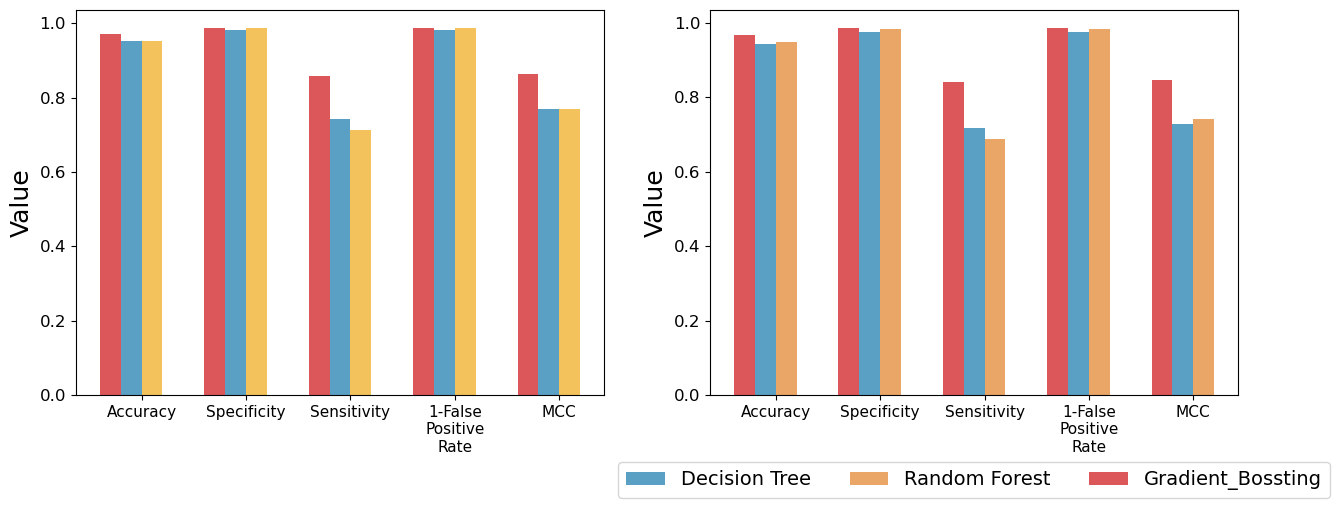

In [187]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(labels))  
width = 0.2  

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Colors for the training set
colors_train = ['#1476AB', '#F0A818', '#CC1013']

# plot the performance metrics for the training set
rects2 = ax1.bar(x, tree_train_values, width, label='Decision Tree', color=colors_train[0], alpha=0.7)
rects3 = ax1.bar(x + width, forest_train_values, width, label='Random Forest', color=colors_train[1], alpha=0.7)
rects1 = ax1.bar(x - width, gb_train_values, width, label='KNN', color=colors_train[2], alpha=0.7)

ax1.set_ylabel('Value', fontsize=18)  
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(labels, fontsize=11)  
ax1.tick_params(axis='y', labelsize=12)  

# Colors for the test set
colors_test = ['#1476AB', '#E18027', '#CC1013']

# plot the performance metrics for the test set
rects2 = ax2.bar(x, tree_test_values, width, label='Decision Tree', color=colors_test[0], alpha=0.7)
rects3 = ax2.bar(x + width, forest_test_values, width, label='Random Forest', color=colors_test[1], alpha=0.7)
rects1 = ax2.bar(x - width, gb_test_values, width, label='Gradient_Bossting', color=colors_test[2], alpha=0.7)

ax2.set_ylabel('Value', fontsize=18)  
ax2.set_xticks(x + width / 2)
ax2.set_xticklabels(labels, fontsize=11) 
ax2.tick_params(axis='y', labelsize=12)  

# Añadir leyenda fuera del gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=14)

plt.show()

In [200]:
#ROC training

In [201]:
from sklearn.metrics import roc_curve, auc

In [202]:
# Predict probabilities for training set
probas_train_tree = grid_search_tree.predict_proba(mlr_X_train_tree)[:, 1]
probas_train_forest = grid_search_forest.predict_proba(mlr_X_train_forest)[:, 1]
probas_train_gb = grid_search_gb.predict_proba(mlr_X_train_gb)[:, 1]

In [203]:
# Compute ROC curve and AUC for decision tree model
fpr_train_tree, tpr_train_tree, thresholds_train_tree = roc_curve(y_train_tree, probas_train_tree )
roc_auc_train_tree = auc(fpr_train_tree, tpr_train_tree)

In [204]:
# Compute ROC curve and AUC for ramdom forest
fpr_train_forest, tpr_train_forest, thresholds_train_forest = roc_curve(y_train_forest, probas_train_forest )
roc_auc_train_forest = auc(fpr_train_forest, tpr_train_forest)

In [205]:
# Compute ROC curve and AUC for Gradient Boosting
fpr_train_gb, tpr_train_gb, thresholds_train_gb= roc_curve(y_train_gb, probas_train_gb)
roc_auc_train_gb = auc(fpr_train_gb, tpr_train_gb)

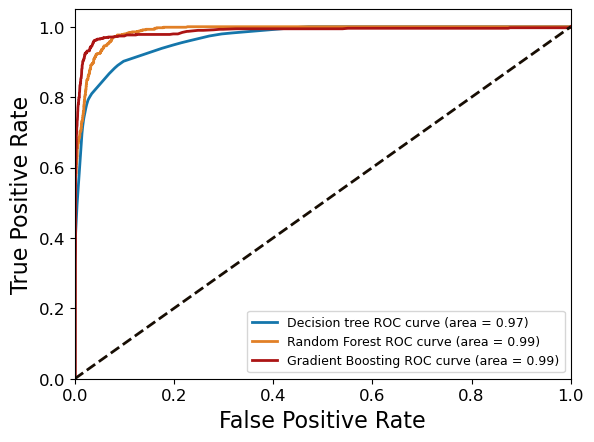

In [206]:
import matplotlib.pyplot as plt

# Plot ROC curves
plt.plot(fpr_train_tree, tpr_train_tree, color='#1476AB', lw=2, label='Decision tree ROC curve (area = %0.2f)' % roc_auc_train_tree)
plt.plot(fpr_train_forest, tpr_train_forest, color='#E18027', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_train_forest)
plt.plot(fpr_train_gb, tpr_train_gb, color='#AB1414', lw=2, label='Gradient Boosting ROC curve (area = %0.2f)' % roc_auc_train_gb)
plt.plot([0, 1], [0, 1], color='#170D03', lw=2, linestyle='--')

# Modify letters size of X and Y axes
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

# Modify number size on X and Y axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.title('Receiver Operating Characteristic (ROC) - Training Set', fontsize=14)
plt.legend(loc="lower right", fontsize=9)

# Save image with transparent background and resolution of 600 dpi
plt.savefig('roc_curve_train.png', dpi=600, transparent=True)
plt.show()

In [207]:
# Curva ROC prediction 

In [208]:
probas_test_tree = grid_search_tree.predict_proba(mlr_X_test_tree)[:, 1]
probas_test_forest = grid_search_forest.predict_proba(mlr_X_test_forest)[:, 1]
probas_test_gb = grid_search_gb.predict_proba(mlr_X_test_gb)[:, 1]

In [209]:
# Compute ROC curve and AUC for decision tree model
fpr_test_tree, tpr_test_tree, thresholds_test_tree = roc_curve(y_test_tree, probas_test_tree)
roc_auc_test_tree = auc(fpr_test_tree, tpr_test_tree)

In [210]:
# Compute ROC curve and AUC for ramdom forest
fpr_test_forest, tpr_test_forest, thresholds_test_forest = roc_curve(y_test_forest, probas_test_forest )
roc_auc_test_forest = auc(fpr_test_forest, tpr_test_forest)

In [211]:
# Compute ROC curve and AUC for Gradient Boosting
fpr_test_gb, tpr_test_gb, thresholds_test_gb= roc_curve(y_test_gb, probas_test_gb)
roc_auc_test_gb = auc(fpr_test_gb, tpr_test_gb)

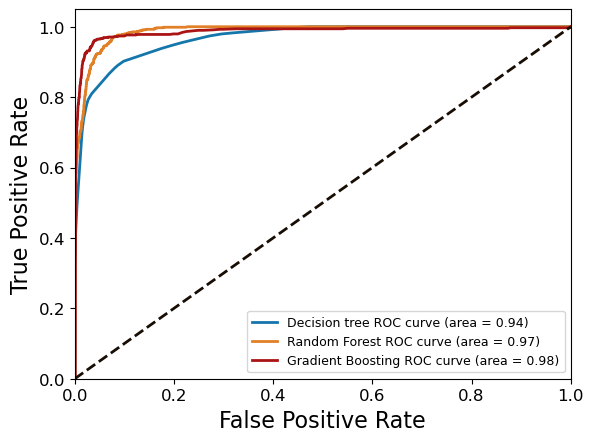

In [212]:
import matplotlib.pyplot as plt

# Plot ROC curves
plt.plot(fpr_train_tree, tpr_train_tree, color='#1476AB', lw=2, label='Decision tree ROC curve (area = %0.2f)' % roc_auc_test_tree)
plt.plot(fpr_train_forest, tpr_train_forest, color='#E18027', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_test_forest)
plt.plot(fpr_train_gb, tpr_train_gb, color='#AB1414', lw=2, label='Gradient Boosting ROC curve (area = %0.2f)' % roc_auc_test_gb)
plt.plot([0, 1], [0, 1], color='#170D03', lw=2, linestyle='--')

# Modify letters size of X and Y axes
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

# Modify number size on X and Y axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right", fontsize=9)

# Save image with transparent background and resolution of 600 dpi
plt.savefig('roc_curve_train.png', dpi=600, transparent=True)
plt.show()